In [ ]:
#!pip install faststylometry
#from faststylometry import Corpus
#from faststylometry import load_corpus_from_folder
#from faststylometry import tokenise_remove_pronouns_en
#from faststylometry import calculate_burrows_delta
import nltk
import pandas as pd
import re
from tqdm.notebook import tqdm
nltk.download("punkt")
tqdm.pandas()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Load cleaned Data

In [ ]:
# For Google Colab
from google.colab import drive
drive.mount('/content/drive')
df_kickstarter = pd.read_csv('./drive/MyDrive/Colab Notebooks/Thesis Data/kickstarter_cleaned_topicmodelling.csv')
#df_indiegogo = pd.read_csv('./drive/MyDrive/Colab Notebooks/Thesis Data/indiegogo_cleaned_topicmodelling.csv')
#df_part1 = pd.read_csv('./drive/MyDrive/Colab Notebooks/Thesis Data/burrowsdelta1.csv')
#df_part2 = pd.read_csv('./drive/MyDrive/Colab Notebooks/Thesis Data/burrowsdelta2.csv')

Mounted at /content/drive


# Preprocess

In [ ]:
def preprocess_text(document: str) -> str:
    """Preprocesses a document to remove special characters/whitespace/etc

    Args:
        document (str):
        stemmer (nltk.stem.WordNetLemmatizer): Stemmer from NLTK
        en_stop (set): Set of stop words, usually from NLTK

    Returns:
        str: preprocessed document
    """

    # Remove all the special characters
    document = re.sub(r'\W', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Tokenization
    tokens = document.split()

    return tokens;

In [ ]:
def preprocess_text_2(document: str) -> str:
    """Preprocesses a document to remove special characters/whitespace/etc

    Args:
        document (str): Input document to preprocess

    Returns:
        str: Preprocessed document
    """

    # Remove all the special characters
    document = re.sub(r'\W', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to lowercase
    document = document.lower()

    return str(document)

In [ ]:
# Remove the columns
df_kickstarter.drop(df_kickstarter.columns.difference(['project_description', 'project_launched_at']), axis=1,inplace=True)

In [ ]:
df_kickstarter.head(10)

,project_launched_at,project_description
0,2009-04-21 21:02:48,About two years ago I realized a profound trut...
1,2009-04-23 00:07:53,Above is a music video edited together with sh...
2,2010-01-05 23:47:25,Acclaimed musical group/recording project My T...
3,2009-05-13 16:54:34,Hi folks! My name is Will and I am the artist ...
4,2009-04-27 14:10:39,Q: What's better than wearing pants?\r\n A: We...
5,2009-05-13 04:30:06,Back in the day there was an awesome CD series...
6,2009-05-12 22:57:18,Gnash is an open source framework in PHP/MySQL...
7,2009-04-29 05:26:32,"I, Dereck Blackburn will be taking upon an inc..."
8,2009-04-29 04:37:37,I just finished writing a play for my local ch...
9,2009-04-29 22:08:13,Help me interview people for my design-focused...


In [ ]:
import numpy as np

# Split DataFrame into two parts
#split_index = np.ceil(len(df_kickstarter) / 2).astype(int)
#df_part1 = df_kickstarter[:split_index]
#df_part2 = df_kickstarter[split_index:]

# Process part 1
#df_part1['project_description'] = df_part1['project_description'].progress_apply(preprocess_text)

# Process part 2
#df_part2['project_description'] = df_part2['project_description'].progress_apply(preprocess_text)

# Merge the results if necessary
#df_processed = pd.concat([df_part1, df_part2])

In [ ]:
df_kickstarter = df_kickstarter.iloc[::10]

In [ ]:
#df_part1.to_csv('./drive/MyDrive/Colab Notebooks/Thesis Data/burrowsdelta1.csv')

In [ ]:
#df_part2.to_csv('./drive/MyDrive/Colab Notebooks/Thesis Data/burrowsdelta2.csv')

In [ ]:
df_kickstarter['project_description'] = df_kickstarter['project_description'].progress_apply(preprocess_text_2)

  0%|          | 0/35309 [00:00<?, ?it/s]

In [ ]:
df_kickstarter.head(10)

,project_launched_at,project_description
0,2009-04-21 21:02:48,about two years ago i realized a profound trut...
10,2009-04-30 01:32:55,last summer michael and jacob guess wrote and ...
20,2009-05-05 07:03:37,one of my favorite albums of all time was put ...
30,2009-05-12 20:50:44,what would the pioneers of jazz sound like on ...
40,2009-06-05 14:07:58,hello kickstarters rvng a small brooklyn based...
50,2009-05-24 21:10:24,hello i am a 27 year old web developer from de...
60,2009-06-14 22:13:57,the big picture i m trying to raise 4 000 by a...
70,2009-06-04 20:04:24,lumberjacking is a feature length indie comedy...
80,2009-06-11 22:59:42,ever since its 2004 release volcano i m still ...
90,2009-06-19 11:57:24,all funds will be used to undertake the final ...


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Convert 'project_launched_at' column to datetime if it's not already
df_kickstarter['project_launched_at'] = pd.to_datetime(df_kickstarter['project_launched_at'])

# Create a new column 'month' containing the month and year information
df_kickstarter['month'] = df_kickstarter['project_launched_at'].dt.to_period('M')

# Tokenize the 'project_description' column and assign the tokens to 'tokens' column
df_kickstarter['tokens'] = df_kickstarter['project_description'].apply(word_tokenize)

# Group the dataframe by the 'month' column
grouped_df = df_kickstarter.groupby(pd.Grouper(key='month'))

# Iterate over the groups and access each subpart
for month, subpart_df in grouped_df:
    print(f"Projects launched in {month}:")
    print(subpart_df)
    print()


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
180    2009-09-15 03:43:36  taking chances can be really hard but this lit...   
190    2009-09-12 21:36:03  in the last century the united states has seen...   
210    2009-09-11 17:10:13  basically we re trying to make a record where ...   
230    2009-09-09 16:51:19  we are a team of women filmmakers whose first ...   
240    2009-09-10 04:11:20  i hope you enjoyed my ridiculous video even th...   
250    2009-09-04 00:47:07  my passion is to show art to the masses in an ...   
260    2009-09-04 13:30:45  the brooklyn skillshare is a one day event of ...   
270    2009-09-09 02:54:30  i propose to shoot shakespeare s macbeth for g...   
280    2009-09-17 18:32:46  music journalist historian alison fensterstock...   
290    2009-09-10 00:53:15  help us produce the new to new york actor s sh...   
300    2009-09-14 19:40:13  i have set up another fundraiser at which can ...   
310    2009-09-12 20:26:10   our mmix fest

# Calculate Delta Metrics

In [75]:
from nltk import FreqDist
whole_corpus_freq_dist_list = []

# Iterate over the groups
for month, subpart_df in grouped_df:
    print(f"Projects launched in {month}:")

    # Combine project descriptions into a single corpus for the current month
    whole_corpus = []
    for tokens in subpart_df['tokens']:
        whole_corpus.extend(tokens)  # Extend the corpus with the tokenized words

    # Get a frequency distribution of the words in the corpus
    whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30)) # 100 most common words or 30?
    whole_corpus_freq_dist_list.append((month, whole_corpus_freq_dist))
    print(whole_corpus_freq_dist)
    print()

Projects launched in 2009-04:
[('the', 15), ('a', 12), ('i', 9), ('to', 9), ('and', 8), ('of', 6), ('with', 4), ('two', 3), ('more', 3), ('out', 3), ('make', 3), ('will', 3), ('is', 3), ('about', 2), ('not', 2), ('be', 2), ('m', 2), ('sure', 2), ('stencil', 2), ('made', 2), ('spray', 2), ('few', 2), ('making', 2), ('have', 2), ('been', 2), ('time', 2), ('over', 2), ('t', 2), ('hand', 2), ('their', 2)]

Projects launched in 2009-05:
[('the', 41), ('to', 31), ('a', 30), ('of', 29), ('and', 19), ('i', 19), ('will', 16), ('for', 15), ('in', 14), ('this', 14), ('by', 11), ('is', 10), ('you', 10), ('be', 9), ('project', 9), ('s', 9), ('my', 8), ('that', 8), ('album', 7), ('an', 6), ('on', 6), ('limited', 5), ('or', 5), ('if', 5), ('all', 4), ('unbunny', 4), ('has', 4), ('but', 4), ('it', 4), ('as', 4)]

Projects launched in 2009-06:
[('the', 135), ('to', 87), ('and', 84), ('a', 62), ('of', 62), ('in', 38), ('i', 38), ('for', 37), ('we', 34), ('is', 24), ('this', 24), ('will', 23), ('with', 2

In [ ]:
print(grouped_df.head(10))

       project_launched_at                                project_description  \
0      2009-04-21 21:02:48  about two years ago i realized a profound trut...   
10     2009-04-30 01:32:55  last summer michael and jacob guess wrote and ...   
20     2009-05-05 07:03:37  one of my favorite albums of all time was put ...   
30     2009-05-12 20:50:44  what would the pioneers of jazz sound like on ...   
40     2009-06-05 14:07:58  hello kickstarters rvng a small brooklyn based...   
...                    ...                                                ...   
352850 2023-03-03 14:17:39   o0 anodized mermaid pins 0o ladies of the dee...   
352860 2023-03-01 14:00:15  hi everyone i m kaitlyn an artist and jewelry ...   
352970 2023-03-08 17:24:35  update challenge coins for both eagle force an...   
352980 2023-03-01 02:26:05  the story from the pages of the smash hit nott...   
352990 2023-03-15 02:12:01  fiddle dragon studios i am jean the creator of...   

          month            

In [ ]:
print(whole_corpus_freq_dist_list)

[(Period('2009-04', 'M'), [('the', 15), ('a', 12), ('i', 9), ('to', 9), ('and', 8), ('of', 6), ('with', 4), ('two', 3), ('more', 3), ('out', 3), ('make', 3), ('will', 3), ('is', 3), ('about', 2), ('not', 2), ('be', 2), ('m', 2), ('sure', 2), ('stencil', 2), ('made', 2), ('spray', 2), ('few', 2), ('making', 2), ('have', 2), ('been', 2), ('time', 2), ('over', 2), ('t', 2), ('hand', 2), ('their', 2), ('or', 2), ('summer', 2), ('horror', 2), ('movie', 2), ('called', 2), ('go', 2), ('into', 2), ('through', 2), ('this', 2), ('all', 2), ('hope', 2), ('these', 2), ('years', 1), ('ago', 1), ('realized', 1), ('profound', 1), ('truth', 1), ('grace', 1), ('jones', 1), ('does', 1), ('give', 1), ('fuck', 1), ('could', 1), ('there', 1), ('anything', 1), ('true', 1), ('so', 1), ('had', 1), ('laser', 1), ('cut', 1), ('started', 1), ('painting', 1), ('tshists', 1), ('intention', 1), ('but', 1), ('then', 1), ('got', 1), ('busy', 1), ('lazy', 1), ('etc', 1), ('however', 1), ('in', 1), ('wild', 1), ('name'

In [76]:
feature_freqs = {}
feature_dict = {}

for month, whole_corpus_freq_dist in whole_corpus_freq_dist_list:
  #print(month)
  feature_freqs[month] = {}
  feature_dict[month] = {}
  #print(month)
  #print(whole_corpus_freq_dist)
  # The main data structure
  features = [word for word,freq in whole_corpus_freq_dist]
  feature_dict[month] = features

  projects_in_month = grouped_df.get_group(month)
  for idx, row in projects_in_month.iterrows():
      #print(idx)
      #print(row)
      tokens = row['tokens']
      # A dictionary for each candidate's features
      feature_freqs[month][idx] = {}

      # A helper value containing the number of tokens in the author's subcorpus
      overall = len(tokens)

      # Calculate each feature's presence in the subcorpus
      for feature in features:
          presence = tokens.count(feature)
          feature_freqs[month][idx][feature] = presence / overall

In [ ]:
print(feature_freqs.keys())

dict_keys([Period('2009-04', 'M'), Period('2009-05', 'M'), Period('2009-06', 'M'), Period('2009-07', 'M'), Period('2009-12', 'M'), Period('2009-08', 'M'), Period('2009-09', 'M'), Period('2009-10', 'M'), Period('2009-11', 'M'), Period('2011-12', 'M'), Period('2010-01', 'M'), Period('2010-04', 'M'), Period('2010-02', 'M'), Period('2010-09', 'M'), Period('2010-06', 'M'), Period('2010-03', 'M'), Period('2010-05', 'M'), Period('2010-12', 'M'), Period('2010-07', 'M'), Period('2011-08', 'M'), Period('2011-10', 'M'), Period('2010-08', 'M'), Period('2010-10', 'M'), Period('2012-04', 'M'), Period('2010-11', 'M'), Period('2011-05', 'M'), Period('2011-07', 'M'), Period('2012-06', 'M'), Period('2011-01', 'M'), Period('2012-03', 'M'), Period('2013-01', 'M'), Period('2012-01', 'M'), Period('2011-02', 'M'), Period('2011-04', 'M'), Period('2012-02', 'M'), Period('2011-03', 'M'), Period('2011-11', 'M'), Period('2012-08', 'M'), Period('2014-02', 'M'), Period('2013-03', 'M'), Period('2013-11', 'M'), Perio

In [ ]:
print(feature_freqs[pd.Period('2009-04', freq='M')])

{0: {'the': 0.029850746268656716, 'a': 0.05223880597014925, 'i': 0.06716417910447761, 'to': 0.022388059701492536, 'and': 0.014925373134328358, 'of': 0.014925373134328358, 'with': 0.022388059701492536, 'two': 0.007462686567164179, 'more': 0.022388059701492536, 'out': 0.007462686567164179, 'make': 0.014925373134328358, 'will': 0.007462686567164179, 'is': 0.0, 'about': 0.007462686567164179, 'not': 0.014925373134328358, 'be': 0.007462686567164179, 'm': 0.014925373134328358, 'sure': 0.007462686567164179, 'stencil': 0.014925373134328358, 'made': 0.014925373134328358, 'spray': 0.014925373134328358, 'few': 0.014925373134328358, 'making': 0.014925373134328358, 'have': 0.007462686567164179, 'been': 0.007462686567164179, 'time': 0.007462686567164179, 'over': 0.014925373134328358, 't': 0.007462686567164179, 'hand': 0.014925373134328358, 'their': 0.007462686567164179, 'or': 0.014925373134328358, 'summer': 0.0, 'horror': 0.0, 'movie': 0.0, 'called': 0.0, 'go': 0.0, 'into': 0.0, 'through': 0.0, 'this

In [77]:
import math

corpus_features = {}

for month in feature_dict:
  # The data structure into which we will be storing the "corpus standard" statistics
  corpus_features[month] = {}
  projects_in_month = grouped_df.get_group(month)

  # For each feature...
  for feature in feature_dict[month]:
      # Create a sub-dictionary that will contain the feature's mean
      # and standard deviation
      corpus_features[month][feature] = {}

      # Calculate the mean of the frequencies expressed in the subcorpora
      feature_average = 0
      for idx, row in projects_in_month.iterrows():
          feature_average += feature_freqs[month][idx][feature]
      feature_average /= len(projects_in_month.index)
      corpus_features[month][feature]["Mean"] = feature_average

      # Calculate the standard deviation using the basic formula for a sample
      feature_stdev = 0
      for idx, row in projects_in_month.iterrows():
          diff = feature_freqs[month][idx][feature] - corpus_features[month][feature]["Mean"]
          feature_stdev += diff*diff
      feature_stdev /= (len(projects_in_month.index) - 1)
      feature_stdev = math.sqrt(feature_stdev)
      corpus_features[month][feature]["StdDev"] = feature_stdev

In [ ]:
print(corpus_features[pd.Period('2009-04', freq='M')])

{'the': {'Mean': 0.04930037313432836, 'StdDev': 0.02750592609652895}, 'a': {'Mean': 0.041744402985074626, 'StdDev': 0.01484132703050123}, 'i': {'Mean': 0.033582089552238806, 'StdDev': 0.04749224649760394}, 'to': {'Mean': 0.02994402985074627, 'StdDev': 0.010685755461960886}, 'and': {'Mean': 0.02621268656716418, 'StdDev': 0.015962671739472436}, 'of': {'Mean': 0.01996268656716418, 'StdDev': 0.007123836974640592}, 'with': {'Mean': 0.014319029850746269, 'StdDev': 0.011411331450118724}, 'two': {'Mean': 0.00998134328358209, 'StdDev': 0.003561918487320296}, 'more': {'Mean': 0.011194029850746268, 'StdDev': 0.015830748832534648}, 'out': {'Mean': 0.00998134328358209, 'StdDev': 0.003561918487320296}, 'make': {'Mean': 0.01058768656716418, 'StdDev': 0.006134415172607175}, 'will': {'Mean': 0.00998134328358209, 'StdDev': 0.003561918487320296}, 'is': {'Mean': 0.009375, 'StdDev': 0.013258252147247766}, 'about': {'Mean': 0.006856343283582089, 'StdDev': 0.0008574988950956262}, 'not': {'Mean': 0.0074626865

In [78]:
feature_zscores = {}

for month in feature_dict:
  feature_zscores[month] = {}
  projects_in_month = grouped_df.get_group(month)
  for idx, row in projects_in_month.iterrows():
      feature_zscores[month][idx] = {}
      for feature in feature_dict[month]:

          # Z-score definition = (value - mean) / stddev
          # We use intermediate variables to make the code easier to read
          feature_val = feature_freqs[month][idx][feature]
          feature_mean = corpus_features[month][feature]["Mean"]
          feature_stdev = corpus_features[month][feature]["StdDev"]
          feature_zscores[month][idx][feature] = ((feature_val-feature_mean)/feature_stdev)

In [47]:
print(feature_zscores[pd.Period('2023-03', freq='M')])

{352840: {'the': 1.4072498597428147, 'and': -1.6182003122081954, 'to': 1.2660046979887931, 'of': 1.4809235205180522, 'a': -1.197763282758233, 'for': 0.18318257043458208, 'in': 0.48447972551452556, 'as': -0.43152149078398805, 'is': 0.9652492903666201, 'i': -0.582402089871572, 'soccer': 2.041241452319315, 'with': -0.16980219600355845, 'you': -0.9206127700133117, 'on': -0.0592875015482424, 'that': 0.29752929143502205, 'will': -0.3752087004342159, 'be': -0.20580188612758574, 'website': 2.041241452319315, 'youth': 2.041241452319315, 'all': -0.14513940591309896, 'this': -0.7817591543290306, 'have': -0.5607414130594403, 'force': -0.39371424779446523, 'are': -0.1919459560030668, 'pins': -0.6021687646556052, 's': -0.5363858341279125, 'head': 2.041241452319315, 'top': 2.041241452319315, 'states': 2.0412414523193148, 'eagle': -0.408248290463863, 'an': 0.9024026867072169, 'not': 1.7712843222382784, 'years': 1.8325922718645358, 'do': 1.5380984324271956, 'united': 2.0412414523193148, 'it': 1.8235820

In [79]:
# Distance "Tensor" (3rd Dimension for month)
delta = {}

for month in tqdm(feature_dict):
  projects_in_month = grouped_df.get_group(month)
  delta[month] = {}
  for idx, row in projects_in_month.iterrows():
    row_idx = idx
    delta[month][row_idx] = {}
    for idx, row in projects_in_month.iterrows():
      col_idx = idx
      delta[month][row_idx][col_idx] = 0
      for feature in feature_dict[month]:
          delta[month][row_idx][col_idx] += math.fabs((feature_zscores[month][row_idx][feature] - feature_zscores[month][col_idx][feature]))
      delta[month][row_idx][col_idx] /= len(feature_dict[month])

  0%|          | 0/168 [00:00<?, ?it/s]

In [50]:
print(delta[pd.Period('2009-05', freq='M')])

{20: {20: 0.0, 30: 1.2705297998427056, 50: 1.2171204172628136}, 30: {20: 1.2705297998427056, 30: 0.0, 50: 1.1989831457955964}, 50: {20: 1.2171204172628136, 30: 1.1989831457955964, 50: 0.0}}


In [80]:
import numpy as np

# Initialize the result dictionary
mean_distances = {}

# Iterate over the months
for month, delta_matrix in delta.items():
    # Convert the delta matrix to a NumPy array
    delta_keys = delta_matrix.keys()
    n = len(delta_keys)
    shape = (n, n)
    delta_array = np.empty(shape)

    for row, key_row in enumerate(delta_keys):
        for col, key_col in enumerate(delta_keys):
            delta_array[row, col] = delta_matrix[key_row][key_col]

    #print(delta_array)
    # Calculate the mean distance
    ones_vector = np.ones(n)
    mean_distance = (1 / (n * (n - 1))) * np.dot(np.dot(ones_vector.T, delta_array), ones_vector)

    # Store the mean distance in the result dictionary
    mean_distances[month] = mean_distance

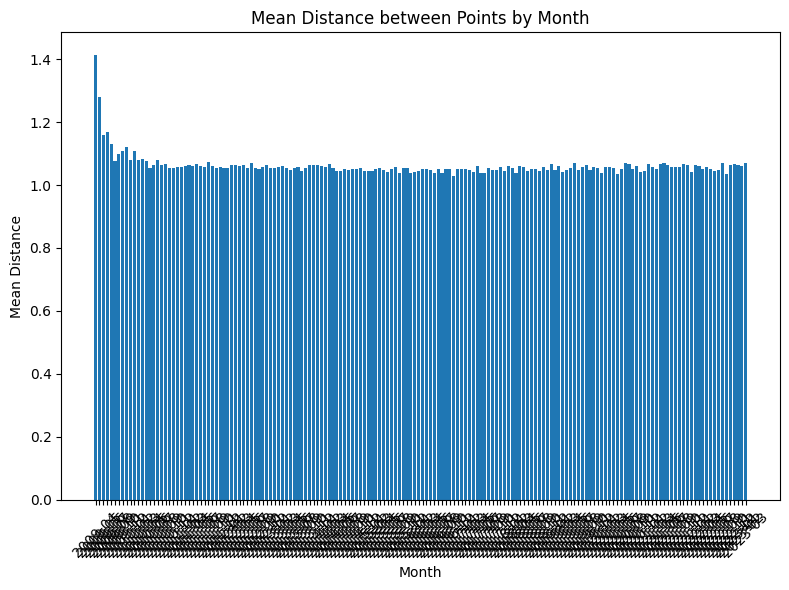

In [81]:
import matplotlib.pyplot as plt

# Extract the sorted months and mean distances
sorted_months = sorted(mean_distances.keys())
mean_distance_values = [mean_distances[month] for month in sorted_months]

# Convert x-values to strings
sorted_months_str = [str(month) for month in sorted_months]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(sorted_months_str, mean_distance_values)
plt.xlabel('Month')
plt.ylabel('Mean Distance')
plt.title('Mean Distance between Points by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

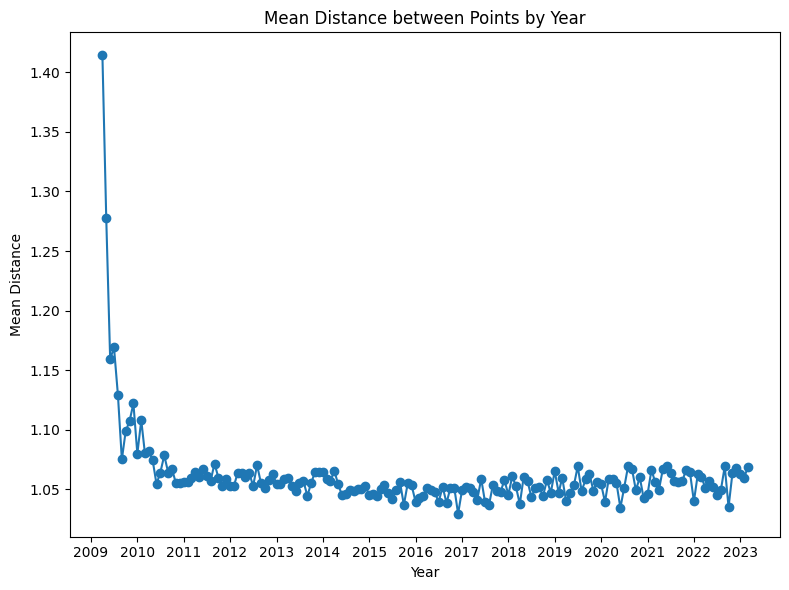

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Extract the sorted months and mean distances
sorted_months = sorted(mean_distances.keys())
mean_distance_values = [mean_distances[month] for month in sorted_months]

# Convert sorted_months to datetime objects with a specific format
date_format = "%Y-%m"  # Modify the format if needed
sorted_months_dates = [datetime.strptime(str(month), date_format) for month in sorted_months]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sorted_months_dates, mean_distance_values, marker='o')

# Set x-axis tick locator and formatter for displaying years only
years_locator = mdates.YearLocator()
years_formatter = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(years_locator)
ax.xaxis.set_major_formatter(years_formatter)

plt.xlabel('Year')
plt.ylabel('Mean Distance')
plt.title('Mean Distance between Points by Year')
plt.tight_layout()
plt.show()